In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
from collections import Counter

# **DataSet:**
Let's Create non-linearly seperable dataset \\

The data set contains 2 classes of total 140 instances. 

These classes are NOT linearly separable from each other.  

There are 2 variables (X1, X2)


In [2]:
class Data(object):
  def gen_non_lin_separable_data(self,seed=1):
        np.random.seed(seed)
        mean1 = [-3, 5]
        mean2 = [5, -3]
        mean3 = [5, -7]
        mean4 = [-7, 5]
        cov = [[1.0, 0.7], [0.7, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2
  def split_data(X1, y1, X2, y2,percent):
        dataset_size = len(X1)
        threshold = int(dataset_size*percent);

        # Training data: binary classifier X1, X2
        X1_train = X1[:threshold]
        y1_train = y1[:threshold]
        X2_train = X2[:threshold]
        y2_train = y2[:threshold]

        #stack datasets
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))

        # Test data:
        X1_test = X1[threshold:]
        y1_test = y1[threshold:]
        X2_test = X2[threshold:]
        y2_test = y2[threshold:]

        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))

        return X_train, y_train, X_test, y_test

In [3]:
Data_obj = Data()
split_data = 0.7
X1, y1, X2, y2= Data_obj.gen_non_lin_separable_data(seed=1)   
X_train, y_train, X_test, y_test = Data.split_data(X1, y1, X2, y2, split_data)   

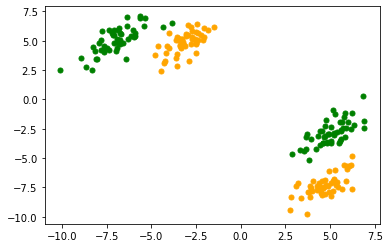

In [4]:
import matplotlib.pyplot as plt
plt.plot(X1[:, 0], X1[:, 1], marker='o',markersize=5, color='orange',linestyle='none')
plt.plot(X2[:, 0], X2[:, 1], marker='o',markersize=5, color='green',linestyle='none')

In [5]:
import pandas as pd
df_features = pd.DataFrame(X_train, columns =['X1', 'X2'])
df_features

,X1,X2
0,-4.260640,3.265495
1,-2.097491,5.071391
2,-2.906484,3.310751
3,-4.313823,3.096549
4,-3.197559,4.609280
...,...,...
135,-7.838645,5.030706
136,-6.039432,5.877846
137,-8.098787,3.422484
138,-4.369432,6.125845


In [6]:
df_target = pd.DataFrame(y_train, columns =['Class'])
df_target

,Class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
135,-1.0
136,-1.0
137,-1.0
138,-1.0


In [7]:
def splits(data):
    splits ={}        
    n_row , n_col = data.shape 
    for col_index in range(n_col):
        values = data[:,col_index]
        unique_values = np.unique(values)   #Get_unique values of the features column.. 
        splits[col_index] = unique_values
    return splits

In [8]:
#Get all Potential Splits
potential_splits = splits(df_features.values)
from pprint import pprint
pprint(potential_splits)

{0: array([-10.11367244,  -8.33478149,  -8.15396425,  -8.09878702,
        -8.02425381,  -7.9429143 ,  -7.8386453 ,  -7.58366788,
        -7.37121136,  -7.34097121,  -7.22806945,  -6.94066797,
        -6.81117253,  -6.74325689,  -6.56585384,  -6.03943203,
        -5.99494715,  -5.89357309,  -4.81765446,  -4.63193327,
        -4.47414026,  -4.36943172,  -4.3138228 ,  -4.26064019,
        -4.17705844,  -4.13411877,  -4.02584079,  -3.9894407 ,
        -3.87036373,  -3.61929772,  -3.6061122 ,  -3.56574149,
        -3.55010785,  -3.5497609 ,  -3.50726253,  -3.48688565,
        -3.42112268,  -3.42039618,  -3.35744707,  -3.34982282,
        -3.33081342,  -3.26464251,  -3.22891516,  -3.19755878,
        -3.14031758,  -3.03836705,  -3.03460722,  -2.96663894,
        -2.95842518,  -2.90648431,  -2.80013508,  -2.78971321,
        -2.71727031,  -2.69986757,  -2.69873411,  -2.55400241,
        -2.52790975,  -2.52427887,  -2.50780588,  -2.50103594,
        -2.47935914,  -2.42862884,  -2.40662515,  -

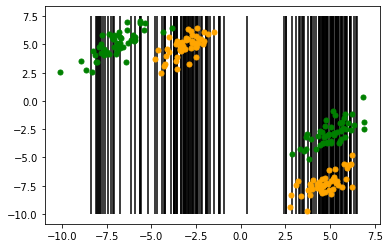

In [9]:


#Splits_based on Column X2
plt.plot(X1[:, 0], X1[:, 1], marker='o',markersize=5, color='orange',linestyle='none')
plt.plot(X2[:, 0], X2[:, 1], marker='o',markersize=5, color='green',linestyle='none')
plt.vlines(x=potential_splits[1],ymin = -10, ymax = 7.5)

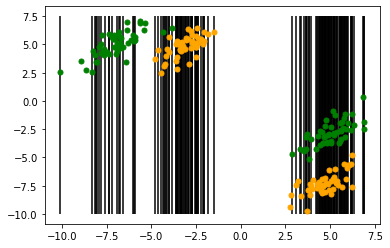

In [10]:
#Splits_based on Column X1
plt.plot(X1[:, 0], X1[:, 1], marker='o',markersize=5, color='orange',linestyle='none')
plt.plot(X2[:, 0], X2[:, 1], marker='o',markersize=5, color='green',linestyle='none')
plt.vlines(x=potential_splits[0],ymin = -10, ymax = 7.5)

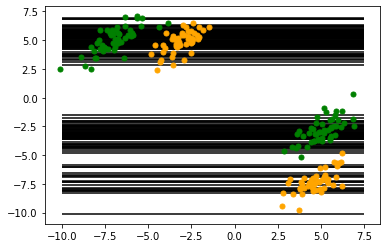

In [11]:
#Splits_based on Column X1
plt.plot(X1[:, 0], X1[:, 1], marker='o',markersize=5, color='orange',linestyle='none')
plt.plot(X2[:, 0], X2[:, 1], marker='o',markersize=5, color='green',linestyle='none')
plt.hlines(y=potential_splits[0],xmin = -10, xmax = 7.5)

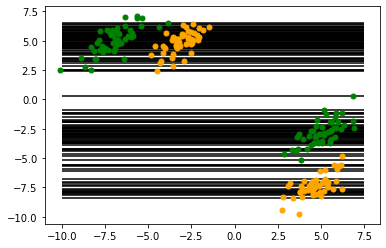

In [12]:
#Splits_based on Column X2
plt.plot(X1[:, 0], X1[:, 1], marker='o',markersize=5, color='orange',linestyle='none')
plt.plot(X2[:, 0], X2[:, 1], marker='o',markersize=5, color='green',linestyle='none')
plt.hlines(y=potential_splits[1],xmin = -10, xmax = 7.5)

# **Step1: Calculating Entropy**

Let's define a function to calculate entropy

image.png

In [13]:
def entropy(y):
    class0 = np.count_nonzero(y_train == 1)/len(y)
    class1 = np.count_nonzero(y_train == -1) / len(y) 
    entropy = -(class0 * np.log2(class0) + class1 * np.log2(class1))
    return entropy

In [14]:
#Let's Calculate Entropy
E = entropy(y_train)
E

1.0

#**Step2: Define fit method**
Iterating over all through unused attribute of \\
the set S and calculates Entropy(H) and 
Information gain(IG) of this attribute.


# **Step -2a: Define Tree node**

**feature:** attribute upon which the node was split when
fitting the training data

**threshold:** val used for splitting

**left:** left branch [type: Node]

**right:** right branch [type: Node]

**value:** value of feature





In [15]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [16]:
best_threshold = []
class DecisionTree:
    ''' 
      param: 
      max_depth: limiting depth
      n_features: num features
    '''
    def __init__(self,x,y,max_depth=20, n_feats=None):
        self.min_samples_split = 2
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.x = x
        self.y = y
        self.n_feats = self.x.shape[1] 
        self.root =  self._build_tree(self.x, self.y)

    def fit(self):
        self.n_feats = self.x.shape[1] 
        self.root = self._build_tree(self.x, self.y)
        return self.root

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth or n_samples < self.min_samples_split):
            return Node(value=self._most_common_label(y))
        #get sample index
        indx = np.random.choice(n_features, self.n_feats, replace=True)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_split(X, y, indx)
        best_threshold.append(best_thresh)
        # add nodes based on best split 
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._build_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._build_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            #get feature column
            X_column = X[:, feat_idx]
            #get all unique values of the column
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                #get IG on all possible thresholf values and store best split index in split_idx
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [17]:
model = DecisionTree(X_train, y_train)
model.fit()
print(model.predict(X_test))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
 -1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.
  1.  1.  1.  1.  1. -1.]


In [18]:

Accuracy = (y_test == model.predict(X_test))
Accuracy = Accuracy.mean()
print('Accuracy of prediction is  {} '.format(Accuracy))

Accuracy of prediction is  0.7833333333333333 


In [19]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.2,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


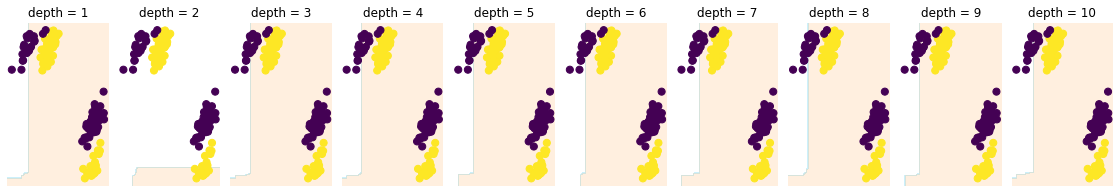

In [20]:
fig, ax = plt.subplots(1, 10, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(ax, range(1, 11)):
    visualize_tree(model, X_train, y_train, ax=axi)
    axi.set_title('depth = {0}'.format(depth))



# **Random Forest**
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

Paramters:

'n_trees' : number of trees

'n_features': number of features

'depth': max depth

'min_leaf': minimum leaves in branch

In [21]:
class RandomForest():
    '''
      Paramters:

      'n_trees' : number of trees

      'n_features': number of features

      'depth': max depth

      'min_leaf': minimum leaves in branch

    '''
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf= 3):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features 
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree(i) for i in range(n_trees)]

    def create_tree(self,i):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        model = DecisionTree(self.x[idxs], self.y[idxs],80)
        ax =  plt.gca()
    
        # Plot the training points
        ax.scatter(self.x[:, 0], self.x[:, 1], c=self.y, s=50, cmap='viridis',
                  clim=(self.y.min(), self.y.max()), zorder=3)
        ax.axis('tight')
        ax.axis('off')
       
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        
        # fit the estimator
        model.fit()
        xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                            np.linspace(*ylim, num=200))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        n_classes = len(np.unique(self.y))
        Z = Z.reshape(xx.shape)
        contours = ax.contourf(xx, yy, Z, alpha=0.2,
                              levels=np.arange(n_classes + 1) - 0.5,
                              cmap='rainbow', clim=(self.y.min(), self.y.max()),
                              zorder=1)
        return model
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: The following kwargs were not used by contour: 'clim'


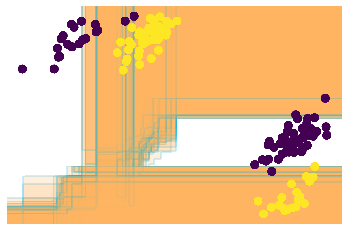

In [22]:
n_samples, n_features = X_train.shape
model = RandomForest(X_train, y_train,70,n_features,70,200 )

In [23]:
d = model.predict(X_test)
d = [-1.0 if i <0 else 1.0 for i in d]

In [24]:
Accuracy = (y_test == d)
Accuracy = Accuracy.mean()
print('Accuracy of prediction is  {} '.format(Accuracy))

Accuracy of prediction is  0.9166666666666666 


In [25]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.2,
                           levels=np.arange(n_classes + 2) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


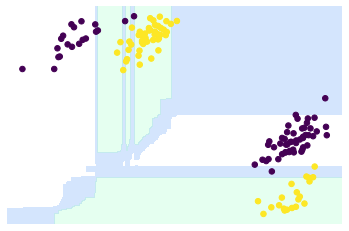

In [26]:
visualize_tree(model, X_train, y_train)